# Support Vector Machines

## Small Examples

We'll start practicing using support vector machines with some small examples consisting of fake data.

As usual, we start by importing some libraries. We import numpy (good for math functions), sklearn's svm functions (support vector machines), and the plotting library from matplotlib. We also import confusion_matrix and accuracy_score from the metrics library in scikit-learn, which we'll use to evaluate the accuracy of our model.

In [0]:
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

Next, let's make our datasets. The first dataset has two classes. The second and third datasets both have two classes, with slightly different distributions. We'll eventually see how these distribution affect the support vector machine.

In [0]:
features1 = np.array([[-7,1],[-8,-1,],[-3,-2],[1,1],[2,1],[3,2],[3,1],[3,0]]) #features
labels1 = np.array([1,1,1,2,2,2,2,2]) #labels

features2 = np.array([[-7,1],[-8,-1,],[-3,-2],[1,1],[2,1],[3,2],[3,1],[3,0],[4,-2],[4.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]])
labels2 = np.array([1,1,1,2,2,2,2,2,3,3,3,3,3])

features3 = np.array([[-13,-8],[-8,-1,],[-3,-2],[1,2],[2,1],[3,6],[3,7],[3,0],[4,-2],[4.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]])
labels3 = np.array([1,1,1,2,2,2,2,2,3,3,3,3,3])

Let's plot our data to see what it looks like. We'll start with the first dataset, which has only two classes.

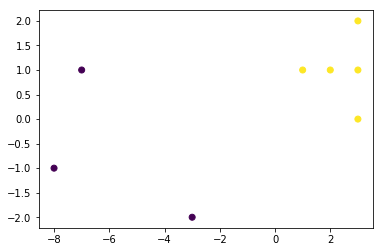

In [3]:
plt.scatter(features1[:,0],features1[:,1],c=labels1)

Next, let's see what the second dataset looks like.

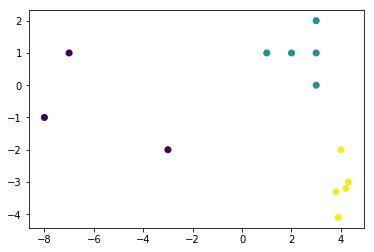

In [4]:
plt.scatter(features2[:,0],features2[:,1],c=labels2)

Finally, we'll plot the third dataset.

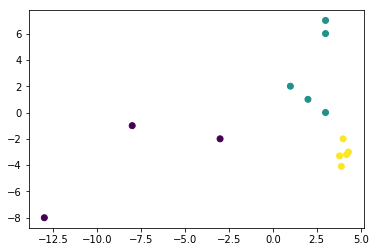

In [5]:
plt.scatter(features3[:,0],features3[:,1],c=labels3)

Notice the differences in the distribution of data between the second data set and the third dataset. How do you think this will affect the support vector machine?

For training a support vector machine, we'll start with the first dataset. We create a support vector machine classifier, and train it on the first dataset. Note the parameter that we use to create the support vector machine: `kernel="linear"`.

In [0]:
clfsvm = svm.SVC(kernel="linear")
clfsvm = clfsvm.fit(features1, labels1)

We've training our support vector machine, and now we'd like to see what it does. As we did when visualizing the results of a decision tree, we'll want to color in the different regions of our graph. To do this, we use the same functions that we used previously to make a grid of points, which will then be classified in order to figure out how to color the graph.

(This is code from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html.)

In [0]:
# this function creates the grid of points
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# This takes in the graph axes, the model, the grid above, and plots the colors
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Now we use these functions to plot our data and regions.

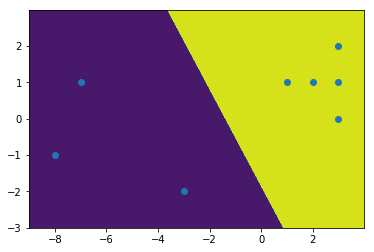

In [8]:
X=features1

# this splits the data into x and y components, and makes the grid based on the data
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# we create our plot
fig, ax = plt.subplots()
# this colors in the regions
plot_contours(ax, clfsvm, xx, yy)
# this plots our data points.
ax.scatter(X0, X1)
# this shows our plot
plt.show()

Next, let's train a support vector machine using the second dataset, and color in the regions. Again, we'll stick with linear boundaries.

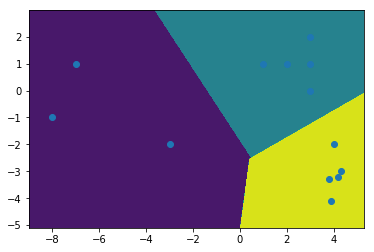

In [9]:
# this creates and trains the support vector machine classifier
clfsvm = svm.SVC(kernel="linear")
clfsvm = clfsvm.fit(features2, labels2)

X=features2

# this splits the data into x and y components, and makes the grid based on the data
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# we create our plot
fig, ax = plt.subplots()
# this colors in the regions
plot_contours(ax, clfsvm, xx, yy)
# this plots our data points.
ax.scatter(X0, X1)
# this shows our plot
plt.show()

Finally, we use the third dataset.

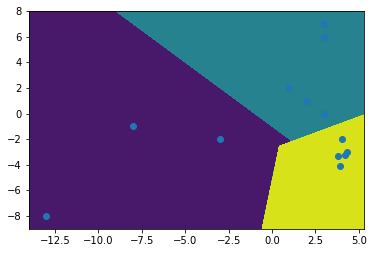

In [10]:
# this creates and trains the support vector machine classifier
clfsvm = svm.SVC(kernel="linear")
clfsvm = clfsvm.fit(features3, labels3)

X=features3

# this splits the data into x and y components, and makes the grid based on the data
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# we create our plot
fig, ax = plt.subplots()
# this colors in the regions
plot_contours(ax, clfsvm, xx, yy)
# this plots our data points.
ax.scatter(X0, X1)
# this shows our plot
plt.show()

Compare this with the regions for the second dataset. Does it look very different? Do the points away from the boundaries make much of a difference?

Now that we've had a chance to play around with some fake data, let's try using support vector machines for some real data! We'll use both the iris dataset (which we used with the $k$-nearest neighbor algorithm) and the breast cancer dataset (which we used with decision trees).

# Iris Dataset

We'll start by importing the iris data. You can find a lot more examples of working with the iris data at http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html.

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

# We'll use the same names as the scikit-learn tutorial so that you can use that code if you like
iris_X = iris.data # this is our data
iris_y = iris.target # these are the labels

We could use the split our data into a training and testing set using the `train_test_split` function from scikit-learn, but let's try doing something different this time. We'll mix up the data randomly using the `permutation` function in numpy, and then use the first part of the data for training, and the last ten data points for testing.

In [0]:
# We pick a random seed (a random starting point)
np.random.seed(0)
# then permute the data randomly!
indices = np.random.permutation(len(iris_X))
# Take everything but the last 10 points for training
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
# take those 10 points for testing
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

Next, we use our training set to train a support vector machine classifier, with linear boundaries.

In [0]:
svc = svm.SVC(kernel='linear')
svc = svc.fit(iris_X_train, iris_y_train)

Now that we've trained our classifier, let's use it to try to predict the classes of our test data.

In [0]:
y_pred = svc.predict(iris_X_test)

To see how well it performed, let's check out the confusion matrix.

In [15]:
confusion_matrix(iris_y_test, y_pred)

array([[4, 0, 0],
       [0, 3, 1],
       [0, 0, 2]])

We can also compute the accuracy score.

In [16]:
accuracy_score(y_pred, iris_y_test)

0.9

What do you think of the accuracy of our predictions? How does it compare to the results of the $k$-nearest neighbor algorithm?

# Breast Cancer Dataset

Next, let's use support vector machines for classification on the breast cancer dataset. We start by importing the dataset.

In [0]:
bcdata = datasets.load_breast_cancer()

bc_X = bcdata.data
bc_y = bcdata.target

This time, let's use the `test_train_split` function to split our data.

In [0]:
from sklearn.model_selection import train_test_split

bc_X_train, bc_X_test, bc_y_train, bc_y_test = train_test_split(bc_X, bc_y, test_size=0.25, random_state=27)

Now, we'll train our classifier.

In [0]:
svc = svm.SVC(kernel='linear')
svc = svc.fit(bc_X_train, bc_y_train)

Then we use the classifier to attempt to predict the classes of the test set.

In [0]:
y_pred = svc.predict(bc_X_test)

We compute the confusion matrix.

In [21]:
confusion_matrix(bc_y_test, y_pred)

array([[51,  6],
       [ 1, 85]])

Finally, we compute the accuracy score.

In [22]:
accuracy_score(y_pred, bc_y_test)

0.951048951048951

What do you think of the accuracy of this model? How does it compare to our decision tree?